In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
# converting the csv file to a pandas dataframe
cruise_df = pd.read_csv('cruise_ship_info.csv')

In [3]:
cruise_df.head()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


In [4]:
cruise_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
Ship_name            158 non-null object
Cruise_line          158 non-null object
Age                  158 non-null int64
Tonnage              158 non-null float64
passengers           158 non-null float64
length               158 non-null float64
cabins               158 non-null float64
passenger_density    158 non-null float64
crew                 158 non-null float64
dtypes: float64(6), int64(1), object(2)
memory usage: 11.2+ KB


In [5]:
cruise_df.describe()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,15.689873,71.284671,18.457405,8.130633,8.830000,39.900949,7.794177
std,7.615691,37.229540,9.677095,1.793474,4.471417,8.639217,3.503487
min,4.000000,2.329000,0.660000,2.790000,0.330000,17.700000,0.590000
25%,10.000000,46.013000,12.535000,7.100000,6.132500,34.570000,5.480000
50%,14.000000,71.899000,19.500000,8.555000,9.570000,39.085000,8.150000
75%,20.000000,90.772500,24.845000,9.510000,10.885000,44.185000,9.990000
max,48.000000,220.000000,54.000000,11.820000,27.000000,71.430000,21.000000


                        Age   Tonnage  passengers    length    cabins  \
Age                1.000000 -0.606646   -0.515542 -0.532286 -0.510019   
Tonnage           -0.606646  1.000000    0.945061  0.922368  0.948764   
passengers        -0.515542  0.945061    1.000000  0.883535  0.976341   
length            -0.532286  0.922368    0.883535  1.000000  0.889798   
cabins            -0.510019  0.948764    0.976341  0.889798  1.000000   
passenger_density -0.278830 -0.040846   -0.294867 -0.090488 -0.253181   
crew              -0.530657  0.927569    0.915234  0.895857  0.950823   

                   passenger_density      crew  
Age                        -0.278830 -0.530657  
Tonnage                    -0.040846  0.927569  
passengers                 -0.294867  0.915234  
length                     -0.090488  0.895857  
cabins                     -0.253181  0.950823  
passenger_density           1.000000 -0.155509  
crew                       -0.155509  1.000000  


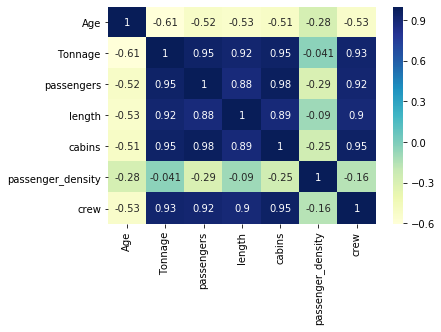

In [6]:
# finding the corelation among features
cruisecor=cruise_df.corr()
print(cruisecor)
dataplot = sns.heatmap(cruise_df.corr(), cmap="YlGnBu", annot=True)
plt.show()


In [7]:
# we dropped the age and passenger_density features as they dont have much correlation with the others
cruise_df.drop(['Age', 'passenger_density'], axis = 1, inplace = True)

In [8]:
cruise_df.head()

,Ship_name,Cruise_line,Tonnage,passengers,length,cabins,crew
0,Journey,Azamara,30.277,6.94,5.94,3.55,3.55
1,Quest,Azamara,30.277,6.94,5.94,3.55,3.55
2,Celebration,Carnival,47.262,14.86,7.22,7.43,6.70
3,Conquest,Carnival,110.000,29.74,9.53,14.88,19.10
4,Destiny,Carnival,101.353,26.42,8.92,13.21,10.00


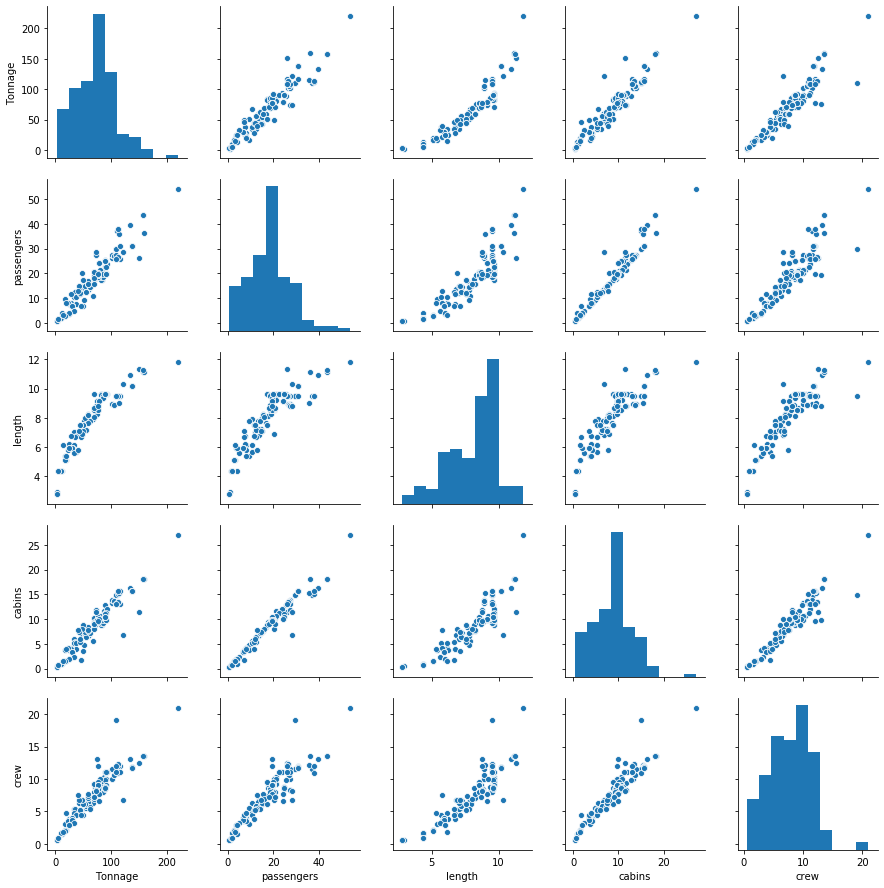

In [9]:
sns.pairplot(cruise_df)

## All the above features are highly correllated to each other

# The passengers increase with the increase in cabins
# The crew increase with the increase in cabins
# The tonnage increase with the increse in length

# Since we havent been told what our label would be we can assume that the dataset belongs to the unsupervised machine learning category.
# Also the data set is very small in number, applying any complex algorithms the result might lead to overfitting.

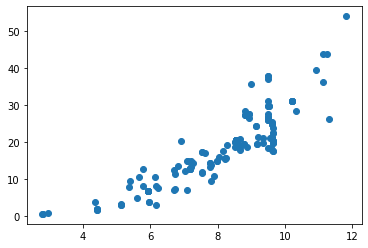

In [10]:
plt.scatter(cruise_df['length'], cruise_df['passengers'] )

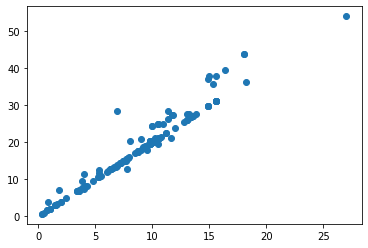

In [11]:
plt.scatter(cruise_df['cabins'], cruise_df['passengers'] )

In [12]:
# since the correlation is very high among the columns.
# so we will try the Principal component analysis to solve the dimentionality reduction

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


In [13]:
cruise_df.keys()

Index(['Ship_name', 'Cruise_line', 'Tonnage', 'passengers', 'length', 'cabins',
       'crew'],
      dtype='object')

In [14]:
# we dropped the catagorical variables
cruise_df.drop(['Ship_name', 'Cruise_line'], axis = 1, inplace = True)

In [15]:
scaler = MinMaxScaler()
scaler.fit(cruise_df)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [16]:
scaled_data = scaler.transform(cruise_df)

In [17]:
scaled_data

array([[1.28395606e-01, 1.17735283e-01, 3.48837209e-01, 1.20734908e-01,
        1.45026948e-01],
       [1.28395606e-01, 1.17735283e-01, 3.48837209e-01, 1.20734908e-01,
        1.45026948e-01],
       [2.06426212e-01, 2.66216723e-01, 4.90586932e-01, 2.66216723e-01,
        2.99363057e-01],
       [4.94650183e-01, 5.45181852e-01, 7.46400886e-01, 5.45556805e-01,
        9.06908378e-01],
       [4.54925093e-01, 4.82939633e-01, 6.78848283e-01, 4.82939633e-01,
        4.61048506e-01],
       [3.12572644e-01, 3.72328459e-01, 6.37873754e-01, 3.70078740e-01,
        4.21852033e-01],
       [3.12572644e-01, 3.72328459e-01, 6.37873754e-01, 3.70078740e-01,
        4.21852033e-01],
       [3.12572644e-01, 3.73078365e-01, 6.37873754e-01, 3.70828646e-01,
        4.21852033e-01],
       [3.12572644e-01, 3.72328459e-01, 6.37873754e-01, 3.70078740e-01,
        4.21852033e-01],
       [4.95748170e-01, 6.81289839e-01, 7.44186047e-01, 5.45181852e-01,
        5.34541891e-01],
       [4.94650183e-01, 5.4518

In [18]:
# lets try the PCA technique
from sklearn.decomposition import PCA

In [19]:
#from 5 components we want to derive two principal component
pca=PCA(n_components=2)

In [20]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [21]:
x_pca=pca.transform(scaled_data)

In [22]:
scaled_data.shape

(158, 5)

In [23]:
x_pca.shape

(158, 2)

## from 5 features we have scaled down to two principal or important features in x_pca 

## lets make a scatterplot with the principal components and the passengers component

Text(0, 0.5, 'Second principle component')

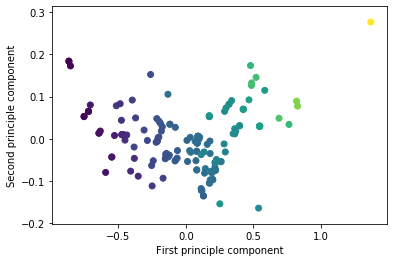

In [24]:
plt.figure(figsize=(6,4))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cruise_df['passengers'])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

#  Clustering With K Means

In [28]:
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(x_pca)
y_predicted

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1], dtype=int32)

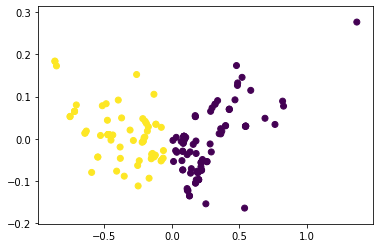

In [30]:
# we made another scatterplot with the predicted value and the Principal components

plt.scatter(x_pca[:,0],x_pca[:,1],c=y_predicted)


# Finally we can see that there is no overlaying of the clusters which means K-Mean cluster algorithm did its job nicely.